In [9]:
!pip install kaggle

In [11]:
from google.colab import files
files.upload()  # Select kaggle.json

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [12]:
# API----CIFAR-10 - Object Recognition in Images
!kaggle competitions download -c cifar-10

 97% 697M/715M [00:07<00:00, 189MB/s]
100% 715M/715M [00:07<00:00, 105MB/s]


In [13]:
!ls

 cifar-10.zip  'kaggle (1).json'   sample_data


In [14]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [15]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 29.8 MB/s eta 0:00:00


In [16]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [19]:
DATA = os.listdir('/content/train')

In [20]:
type(DATA)

list

In [21]:
len(DATA)

50000

In [22]:
print(DATA[0:5])
print(DATA[-5:])

['8125.png', '33343.png', '4078.png', '29182.png', '8738.png']
['9615.png', '7162.png', '1056.png', '38453.png', '40492.png']


**PROPERLY LABELLING THE DATA**

In [23]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [24]:
labels_df.shape

(50000, 2)

In [25]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [29]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [30]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [31]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [32]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [33]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [40]:
LABELS_DICTIONARY = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [LABELS_DICTIONARY[i] for i in labels_df['label']]

In [41]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


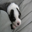

In [37]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [44]:
id_list = list(labels_df['id'])

In [45]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**PROCESSING THE IMAGES**

In [47]:
# convert images to numpy arrays

TRAIN_DATAfolder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(TRAIN_DATAfolder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [48]:
type(data)

list

In [49]:
len(data)

50000

In [50]:
type(data[0])

numpy.ndarray

In [51]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
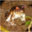

In [52]:
data[0]

In [53]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [54]:
type(X)

numpy.ndarray

In [55]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**SPLITTING THE DATA**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [58]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [59]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
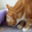

In [60]:
X_train[0]

**NEURAL NETWORK**

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
num_of_classes = 10
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [64]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.1891 - loss: 2.1933 - val_acc: 0.2450 - val_loss: 2.0035
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2373 - loss: 2.0041 - val_acc: 0.2482 - val_loss: 1.9644
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.2492 - loss: 1.9739 - val_acc: 0.2537 - val_loss: 1.9349
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2561 - loss: 1.9470 - val_acc: 0.2520 - val_loss: 1.9266
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2490 - loss: 1.9427 - val_acc: 0.2575 - val_loss: 1.9179
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2500 - loss: 1.9358 - val_acc: 0.2533 - val_loss: 1.9234
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2559 - loss: 1.9279 - val_acc: 0.2522 - val_loss: 1.9091
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2550 - loss: 1.9288 - val_acc: 0.2503 - val_loss: 1.9438
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [65]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [66]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [69]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [71]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [72]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 447s 352ms/step - acc: 0.3275 - loss: 2.0179 - val_acc: 0.7745 - val_loss: 0.8527
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 413s 351ms/step - acc: 0.6684 - loss: 1.0891 - val_acc: 0.8915 - val_loss: 0.4794
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 344ms/step - acc: 0.7945 - loss: 0.7810 - val_acc: 0.9147 - val_loss: 0.3565
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 351ms/step - acc: 0.8638 - loss: 0.5919 - val_acc: 0.9287 - val_loss: 0.2879
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 351ms/step - acc: 0.9049 - loss: 0.4628 - val_acc: 0.9317 - val_loss: 0.2671
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 351ms/step - acc: 0.9325 - loss: 0.3721 - val_acc: 0.9345 - val_loss: 0.2389
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 344ms/step - acc: 0.9519 - loss: 0.2966 - val_acc: 0.9370 - val_loss: 0.2246
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 351ms/step - acc: 0.9638 - loss: 0.2410 - val_acc: 0.9392 - val_loss: 0.2145
Epoch 9/

In [73]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 112ms/step - acc: 0.9380 - loss: 0.2263
Test Accuracy = 0.9358999729156494


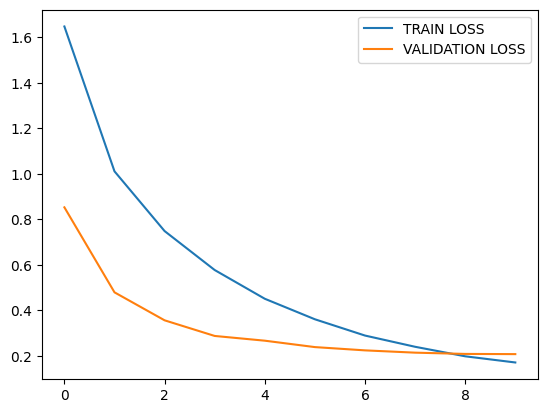

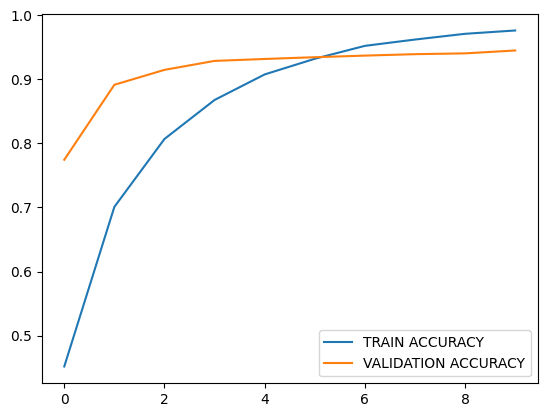

In [74]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='TRAIN LOSS')
plt.plot(h.history['val_loss'], label='VALIDATION LOSS')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='TRAIN ACCURACY')
plt.plot(h.history['val_acc'], label='VALIDATION ACCURACY')
plt.legend()
plt.show()

In [77]:
Y_pred_probabilities = model.predict(X_test_scaled)
Y_pred = np.argmax(Y_pred_probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step


In [78]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(Y_test, Y_pred, target_names=labels_df['label'].unique())
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        frog       0.93      0.96      0.95      1029
       truck       0.97      0.96      0.97       996
        deer       0.91      0.94      0.92      1031
  automobile       0.85      0.90      0.87       982
        bird       0.93      0.93      0.93      1008
       horse       0.92      0.86      0.89       998
        ship       0.98      0.95      0.96       994
         cat       0.96      0.93      0.94       998
         dog       0.97      0.97      0.97       989
    airplane       0.96      0.97      0.97       975

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



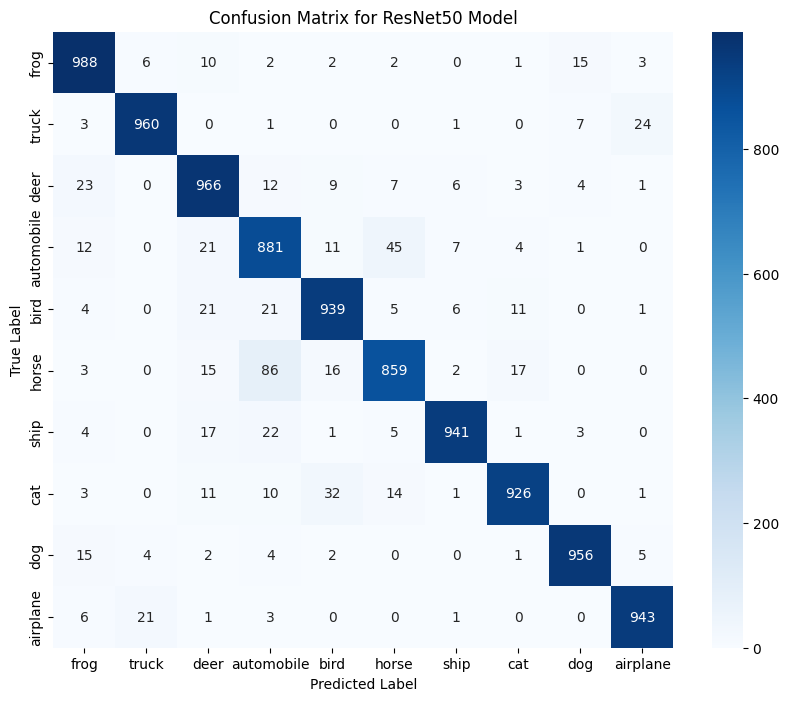

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # Import numpy for argmax

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Get the class names from the labels_df
class_names = labels_df['label'].unique()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix for ResNet50 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step


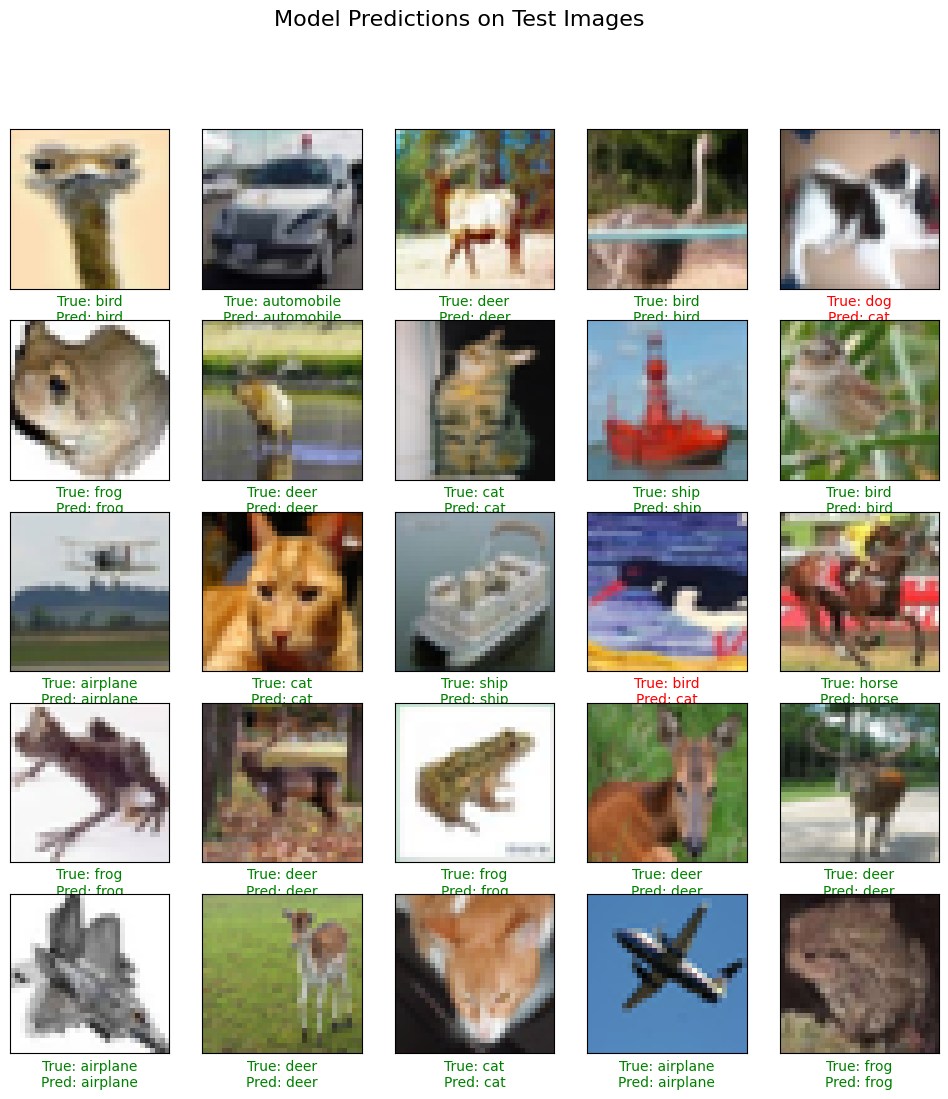

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Create a reverse dictionary to map integer labels to class names
labels_dict_inv = {v: k for k, v in LABELS_DICTIONARY.items()}

# Generate predictions for the test set
Y_pred_probabilities = model.predict(X_test_scaled)
Y_pred_labels = np.argmax(Y_pred_probabilities, axis=1)

# Set up the plot
plt.figure(figsize=(12, 12))
plt.suptitle('Model Predictions on Test Images', fontsize=16)

# Display a grid of 25 test images with their labels
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = labels_dict_inv[Y_test[i]]
    predicted_label = labels_dict_inv[Y_pred_labels[i]]

    # Highlight correct predictions in green and incorrect in red
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.show()